In [2]:
from matricesRalas import MatrizRala
from GaussJordan import GaussJordan
from funciones_utiles import norma
import matplotlib.pyplot as plt

Dado el grafo $\mathnormal{G} = (\mathnormal{N}, \mathnormal{A})$ en donde $\mathnormal{N}$ es el conjunto de papers $\{\mathbf{A}, ... , \mathbf{K}\}$ (lo representamos como el conjunto $\{0, 1, ... , n\}$ ) y $\mathnormal{A}$ son los arcos dirigidos, los cuales represetan las citas. Se tiene que un arco $(i,j) \in \mathnormal{A}$ con los nodos $i,j  \in \mathnormal{N} \Leftrightarrow i$ cita a $j$.

De este modo, definimos una entrada $w_{ij}$ de la matriz $\mathnormal{W} \in \mathbb{R}^{n \times n}$ (tomada del enunciado) como:

$$   
w_{ij} =
\begin{cases}
  1 & \text{si} \; j \;\text{cita a}\; i\\
  0 & \text{si no}
\end{cases}
$$

Del mismo modo, definimos la entrada $d_{ii}$ de la matriz diagonal $\mathnormal{D} \in \mathbb{R}^{n \times n}$ (tomada del enunciado) como:

$$   
d_{ii} =
\begin{cases}
  \frac{1}{c_{i}} & \text{si} \; c_{i} \neq 0 \\
  0 & \text{si} \; c_{i} = 0
\end{cases}
$$

En donde $c_{i}$ es la cantidad de citas hechas por el $paper$ $i$:
$$
c_{i} = \sum_{k = 0}^{n} w_{ki}
$$

In [3]:
# Matriz W
W = MatrizRala(11,11)
W[0,2] = 1
W[0,3] = 1
W[0,4] = 1
W[1,0] = 1
W[4, 10] = 1
W[5,0] = 1
W[5, 6] = 1
W[6, 0] = 1
W[6, 7] = 1
W[6, 8] = 1
W[7, 8] = 1
W[8, 5] = 1
W[9, 8] = 1

# Matriz D
D = MatrizRala(11,11)
D[0,0] = 1/3
D[2,2] = 1
D[3,3] = 1
D[4,4] = 1
D[5,5] = 1
D[6,6] = 1
D[7,7] = 1
D[8,8] = 1/3
D[10,10] = 1

# Armamos el vector de 1's
unos = unos = MatrizRala(11,1)
for i in range(11):
    unos[i,0] = 1

Si el sistema converge, se tiene que ($1$ es el vector de todos unos):

$\textbf{p*} = \frac{1-d}{n}*\mathbb{1} + dWD\textbf{p*}$ 

Reemplazando con $d=0,85$ y $n = 11$, y despejando en función de $\textbf{p*}$ queda que:

$(\mathbb{I} - dWD) \textbf{p*} = \frac{0,15}{11}*\mathbb{1}$ 

Ahora, se puede resolver la ecuación matricial usando Gauss-Jordan

In [4]:
# Con GJ
d = 0.85

b = MatrizRala(W.shape[0], 1)

# b = (0.15/11) * vector de unos 
for nro_fila in range(b.shape[0]):
    b[nro_fila, 0] = (1 - d) / (b.shape[0])

# Matriz identidad de 11x11
Id = MatrizRala(W.shape[0], W.shape[1])
for nro_fila in range(Id.shape[0]):
    Id[nro_fila, nro_fila] = 1

# SE CONSTRUYE A = Id - d * W @ D
A = Id - d * W @ D

solucion = GaussJordan(A,b)
print("La solución al sistema es:", solucion)

La solución al sistema es: MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418678 ]
    [ 0.10029571499316091 ]
    [ 0.04529098844839165 ]
    [ 0.11172220521892239 ]
    [ 0.04529098844839165 ]
    [ 0.01363636363636364 ]
])


Ahora queremos analizar la convergencia del sistema de forma iterativa. Para ello iteramos siguiendo la ecuación $\textbf{p}_{t+1} = \frac{1-d}{N}*\mathbb{1} + dWD\textbf{p}_{t}$  hasta que $\|(\textbf{p}_{t+1} - \textbf{p}_{t})\| < \varepsilon$ con $\varepsilon \rightarrow 0^{+}$

Ademas queremos graficar como se va modificando $\|(\textbf{p}_{t} - \textbf{p*})\|$ entre cada iteración a medida que $t$ aumenta.

En 130 iteraciones, el método iterativo convergió al siguiente vector:
MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418682 ]
    [ 0.10029571499316095 ]
    [ 0.04529098844839167 ]
    [ 0.11172220521892244 ]
    [ 0.04529098844839167 ]
    [ 0.01363636363636364 ]
])


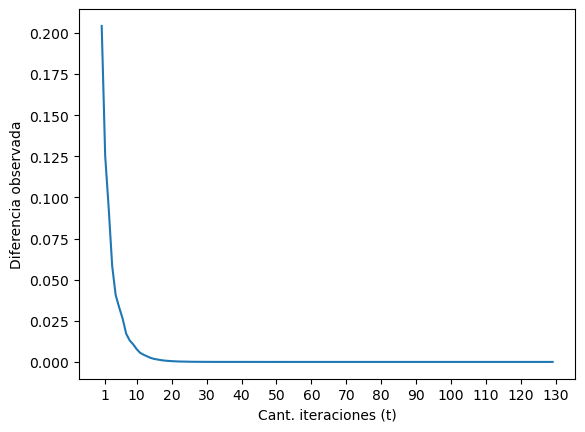

In [5]:
# Método iterativo
# Recordemos W, D y d

# Construimos p_0 asumiendo una distribución inicial equiprobable
p_t = MatrizRala(11,1)
for i in range(11):
    p_t[i,0] = 1/11

i = 0

# Lista de diferencias de normas.
# Para todo i (0 <= i <= |diferencias|) se tiene que, posicion diferencias[i] = norma(p_i - p*)
diferencias = []

while i == 0 or norma(p_next-p_t) > 0:
    if (i != 0):
        p_t = p_next
    
    p_next = unos * ((1 - d) / 11) + d * W @ D @ p_t

    diferencias.append(norma(p_next-solucion))

    i += 1

print(f"En {i} iteraciones, el método iterativo convergió al siguiente vector:")
print(p_next)


# Gráfico
graf, ejes = plt.subplots()
plt.plot(diferencias)
ejes.set_xlabel("Cant. iteraciones (t)")
ejes.set_ylabel("Diferencia observada")
ejes.set_xticks([1,10,20,30,40,50,60,70,80,90,100,110,120,130])
plt.show()
plt.close()



Como puede verse en el gráfico, a partir de $t = 20$ aproximadamente la diferencia empieza a converger.

In [6]:
print(p_next-solucion)

MatrizRala([ 
    [ 0 ]
    [ 0 ]
    [ 0 ]
    [ 0 ]
    [ 0 ]
    [ 4.163336342344337e-17 ]
    [ 4.163336342344337e-17 ]
    [ 2.0816681711721685e-17 ]
    [ 5.551115123125783e-17 ]
    [ 2.0816681711721685e-17 ]
    [ 0 ]
])


Notar que por un tema de truncamiento los valores del método de Gauss-Jordan y el iterativo difieren en niveles despreciables.